#Practical Custom Dataset Implementation:

#Dataset Selection and Environment Setup
We will use the California Housing dataset, which is conveniently available through Scikit-Learn. The goal is to predict the median house value in a California district based on features like median income, house age, etc.

 # Data Preprocessing (and Exploration)

 **1.1: Load Data and Perform Initial Exploration**

This block imports necessary libraries and loads the housing data into a pandas DataFrame, which is a tabular data structure that's easy to analyze.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- Code ---
# Load the dataset as a DataFrame
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame

# Display the first 5 rows of the dataframe
print("--- First 5 Rows of the Dataset ---")
print(df.head())

# Display a concise summary of the dataframe
print("\n--- Dataset Information ---")
df.info()

# Display descriptive statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())

--- First 5 Rows of the Dataset ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  

**1.2: Visualize the Data**

A quick visualization helps us understand the data's distribution and relationships. A histogram is great for seeing the shape of each feature's data.

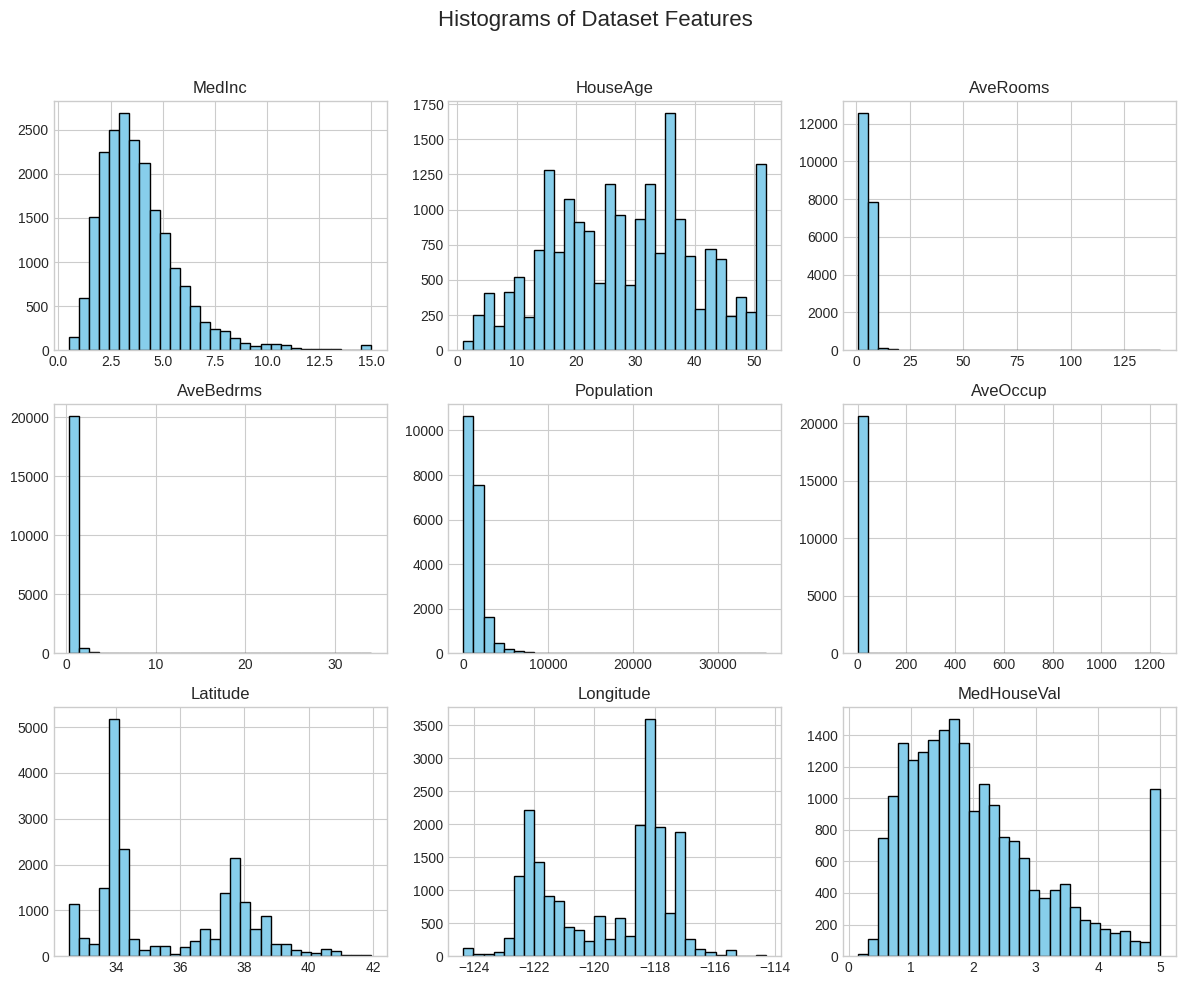

In [ ]:
# --- Code ---
# Set up the plotting area
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(12, 10))
fig.suptitle('Histograms of Dataset Features', fontsize=16)

# Plot a histogram for each numerical feature
for i, col in enumerate(df.columns):
    ax = plt.subplot(3, 3, i + 1)
    df[col].hist(ax=ax, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**1.3: Split Data and Scale Features**

Now, we prepare the data for the models.

**Split:** We separate our data into a training set (to teach the model) and a testing set (to evaluate its performance on unseen data).

**Scale:** We use StandardScaler to scale our features. This standardizes each feature to have a mean of 0 and a standard deviation of 1, which is crucial for Gradient Descent-based models to converge efficiently.

In [ ]:
# Separate features (X) from the target (y)
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

print("Shape of scaled training data:", X_train_scaled.shape)
print("Shape of scaled testing data:", X_test_scaled.shape)

Shape of scaled training data: (16512, 8)
Shape of scaled testing data: (4128, 8)


# Feature Engineering (Polynomial Expansions)
Our current models assume a linear relationship between features and the target. We can capture more complex, non-linear patterns by creating polynomial features. For example, if we have features a and b, a 2nd-degree polynomial expansion will create a², b², and a*b. This allows our linear model to fit curves.

However, this comes with a risk: a high-degree polynomial can easily overfit the data.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# --- Code ---
# Create a pipeline that first adds polynomial features, then scales them
poly_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler())
])

# Create the polynomial and scaled training data
X_train_poly_scaled = poly_pipeline.fit_transform(X_train)

# Check the new number of features
print("Original number of features:", X_train.shape[1])
print("Number of features after 2nd-degree polynomial expansion:", X_train_poly_scaled.shape[1])

# Train a new Linear Regression model on this expanded feature set
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_train_poly_scaled, y_train)

# Make predictions and calculate RMSE
y_train_pred_poly = poly_lin_reg.predict(X_train_poly_scaled)
poly_lin_mse = mean_squared_error(y_train, y_train_pred_poly)
poly_lin_rmse = np.sqrt(poly_lin_mse)


print(f"\nLinear Regression (Original Features) Training RMSE: 0.7224") # From previous step
print(f"Linear Regression (Polynomial Features) Training RMSE: {poly_lin_rmse:.4f}")

Original number of features: 8
Number of features after 2nd-degree polynomial expansion: 44

Linear Regression (Original Features) Training RMSE: 0.7224
Linear Regression (Polynomial Features) Training RMSE: 0.6486


# Train Models
Now for the exciting part. We will train four different regression models and see how they perform. We'll use **Root Mean Squared Error (RMSE)** as our primary metric. RMSE tells us, on average, how far our model's predictions are from the actual values. Lower is better.

# Model 1: Linear Regression (The Baseline)

Linear Regression Training RMSE: 0.7197


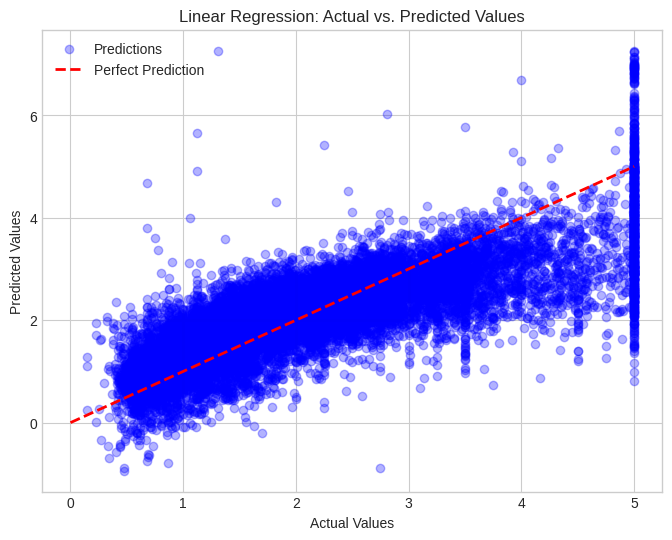

In [ ]:
# --- Code ---
# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model on the scaled training data
lin_reg.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred = lin_reg.predict(X_train_scaled)

# Calculate the RMSE on the training data
lin_mse = mean_squared_error(y_train, y_train_pred)
lin_rmse = np.sqrt(lin_mse)
print(f"Linear Regression Training RMSE: {lin_rmse:.4f}")

# --- Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.3, color='blue', label='Predictions')
plt.plot([0, 5], [0, 5], '--', color='red', lw=2, label='Perfect Prediction') # A line for reference
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Model 2: SGD Regressor (Iterative Optimization)
This model uses Stochastic Gradient Descent to find the best parameters. It's a great example of an iterative approach.

SGD Regressor Training RMSE: 0.7271


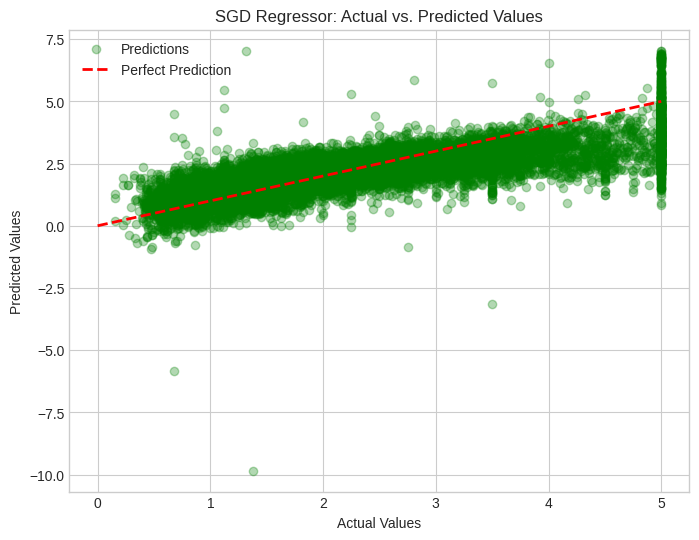

In [ ]:
from sklearn.linear_model import SGDRegressor

# --- Code ---
# Initialize the SGD Regressor model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, random_state=42)

# Train the model on the scaled training data
sgd_reg.fit(X_train_scaled, y_train)

# Make predictions on the training data
y_train_pred_sgd = sgd_reg.predict(X_train_scaled)

# Calculate the RMSE on the training data
sgd_mse = mean_squared_error(y_train, y_train_pred_sgd)
sgd_rmse = np.sqrt(sgd_mse)
print(f"SGD Regressor Training RMSE: {sgd_rmse:.4f}")

# --- Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_sgd, alpha=0.3, color='green', label='Predictions')
plt.plot([0, 5], [0, 5], '--', color='red', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SGD Regressor: Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

# Model 3: Ridge Regression (L2 Regularization)
Now we introduce regularization to see if it helps prevent overfitting and improves generalization. Ridge adds a penalty based on the square of the coefficients.

Ridge Regression Training RMSE: 0.7197


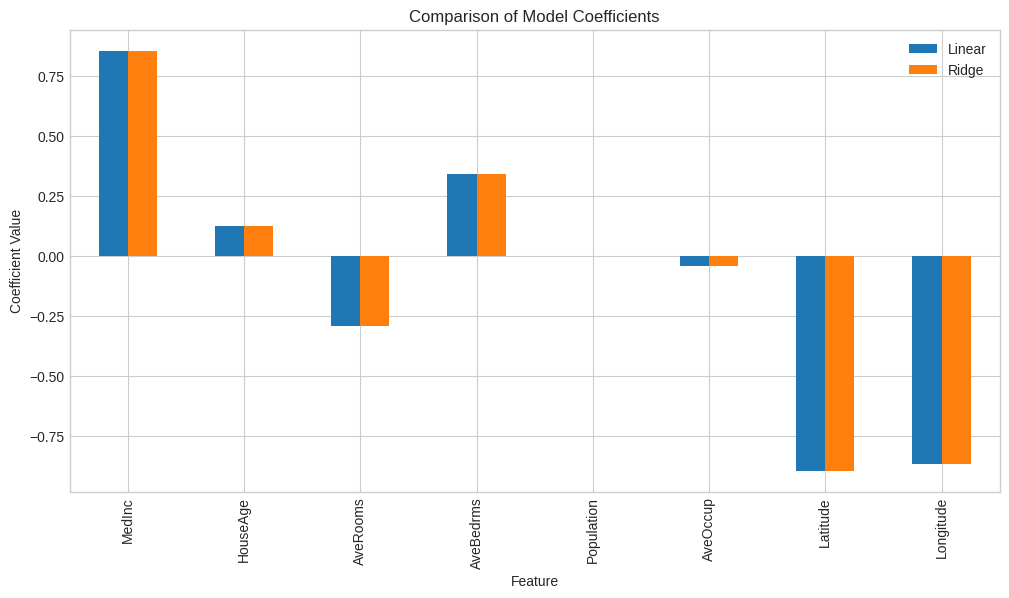

In [ ]:
from sklearn.linear_model import Ridge

# --- Code ---
# Initialize the Ridge Regression model with a chosen alpha
ridge_reg = Ridge(alpha=1.0, solver="cholesky", random_state=42)

# Train the model
ridge_reg.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_ridge = ridge_reg.predict(X_train_scaled)

# Calculate RMSE
ridge_mse = mean_squared_error(y_train, y_train_pred_ridge)
ridge_rmse = np.sqrt(ridge_mse)
print(f"Ridge Regression Training RMSE: {ridge_rmse:.4f}")

# --- Visualization of Coefficients ---
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lin_reg.coef_,
    'Ridge': ridge_reg.coef_
})

coef_df.plot(x='Feature', y=['Linear', 'Ridge'], kind='bar', figsize=(12, 6))
plt.title('Comparison of Model Coefficients')
plt.ylabel('Coefficient Value')
plt.grid(True, axis='y')
plt.show()

# Model 4: Lasso Regression (L1 Regularization)
Lasso is another regularization technique that adds a penalty based on the absolute value of the coefficients. Its key feature is that it can shrink some coefficients all the way to zero.

Lasso Regression Training RMSE: 0.7235


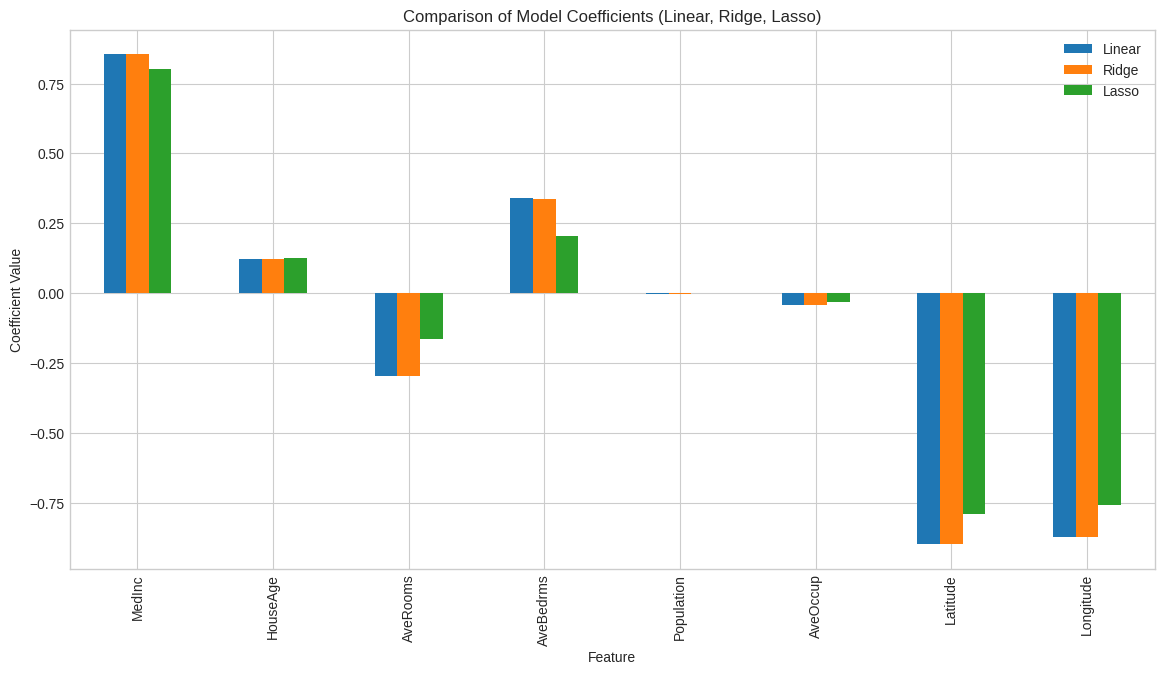

In [ ]:
from sklearn.linear_model import Lasso

# --- Code ---
# Initialize the Lasso Regression model
lasso_reg = Lasso(alpha=0.01, random_state=42)

# Train the model
lasso_reg.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lasso = lasso_reg.predict(X_train_scaled)

# Calculate RMSE
lasso_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_rmse = np.sqrt(lasso_mse)
print(f"Lasso Regression Training RMSE: {lasso_rmse:.4f}")


# --- Visualization of Coefficients ---
coef_df['Lasso'] = lasso_reg.coef_

coef_df.plot(x='Feature', y=['Linear', 'Ridge', 'Lasso'], kind='bar', figsize=(14, 7))
plt.title('Comparison of Model Coefficients (Linear, Ridge, Lasso)')
plt.ylabel('Coefficient Value')
plt.grid(True, axis='y')
plt.show()

 # Model 5 Logistic Regression
Since we chose a regression dataset (predicting a continuous value), Logistic Regression is not applicable here. If we chosen a classification dataset like "Titanic Survival" (predicting a discrete class: survived or not), we would have used LogisticRegression instead of LinearRegression, and our primary metrics would have been Accuracy, Precision, Recall, and F1-score.

# Plot Learning Curves for Each Algorithm
Learning curves are a powerful tool to diagnose bias vs. variance. They plot the model's performance on the training set and the validation set as a function of the training set size.

**High Bias (Underfitting)**: Both curves plateau at a high error. The model is too simple.

**High Variance (Overfitting):** There is a large gap between the low training error and the high validation error. The model is too complex.

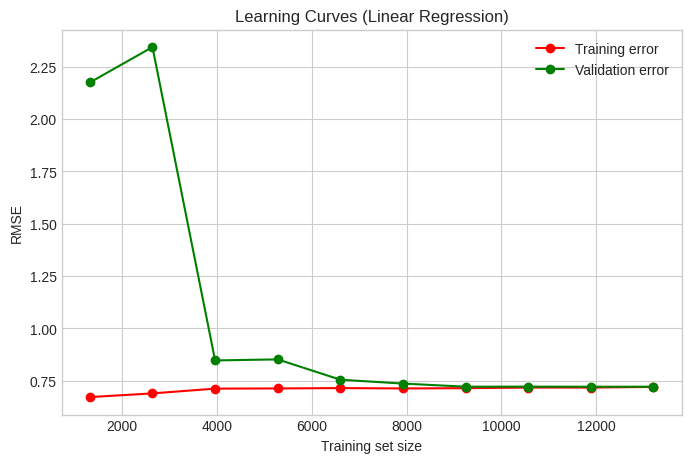

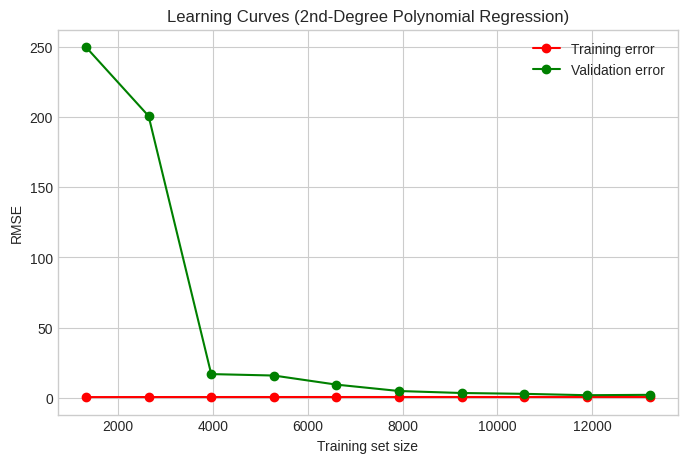

In [ ]:
from sklearn.model_selection import learning_curve

# --- Code ---
# Reusable function to plot learning curves
def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5,
        scoring="neg_mean_squared_error",
        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate RMSE from the negative MSE scores
    train_rmse = np.sqrt(-train_scores)
    test_rmse = np.sqrt(-test_scores)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_rmse.mean(axis=1), 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_rmse.mean(axis=1), 'o-', color="g", label="Validation error")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Plot for the simple Linear Regression model
plot_learning_curves(LinearRegression(), X_train_scaled, y_train, "Learning Curves (Linear Regression)")

# Plot for the Polynomial Regression model (using the full pipeline)
# Note: We pass the unscaled data because the pipeline handles scaling
poly_reg_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(poly_reg_pipeline, X_train, y_train, "Learning Curves (2nd-Degree Polynomial Regression)")

# Tune Hyperparameters Using Grid Search
Our models have hyperparameters (like alpha for Ridge/Lasso) that we've been setting manually. Grid Search is a technique to automate the process of finding the best combination of these parameters. It works by training the model on every combination in a "grid" of specified values and evaluating them using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Code ---
# Create the pipeline we want to tune
# We'll use Ridge regression to regularize the polynomial model
pipeline_to_tune = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("ridge_reg", Ridge(solver="cholesky"))
])

# Define the grid of hyperparameters to search over
# We're telling GridSearchCV to test these different values for 'alpha' in the 'ridge_reg' step
param_grid = {
    'ridge_reg__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Set up the GridSearchCV object
grid_search = GridSearchCV(pipeline_to_tune, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

# Run the search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameter found
print("Best alpha found by Grid Search:", grid_search.best_params_)

# Get the best estimator (the fully trained pipeline with the best alpha)
final_model = grid_search.best_estimator_

# --- Evaluation on Test Set ---
# Now, we evaluate this final, tuned model on the test set for the first time
final_predictions = final_model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

print(f"\nFinal Model RMSE on Test Set: {final_rmse:.4f}")

Best alpha found by Grid Search: {'ridge_reg__alpha': 1.0}

Final Model RMSE on Test Set: 0.6877


 # Comparative Analysis.
In this phase, we will evaluate all the models we've built on the unseen test data, consolidate the results into a clear comparison table, and write a final report analyzing their performance and potential applications.

--- Model Comparison Table ---
                          Model  Test RMSE  Test R² Score  Training Time (s)
              Linear Regression   0.745581       0.575788           0.006538
               Lasso Regression   0.740442       0.581615           0.014230
Polynomial (d=2, Unregularized)   0.681397       0.645682           0.050473
  Polynomial (d=2, Ridge Tuned)   0.687665       0.639133           0.885678


/tmp/ipython-input-20-1176042814.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='viridis')


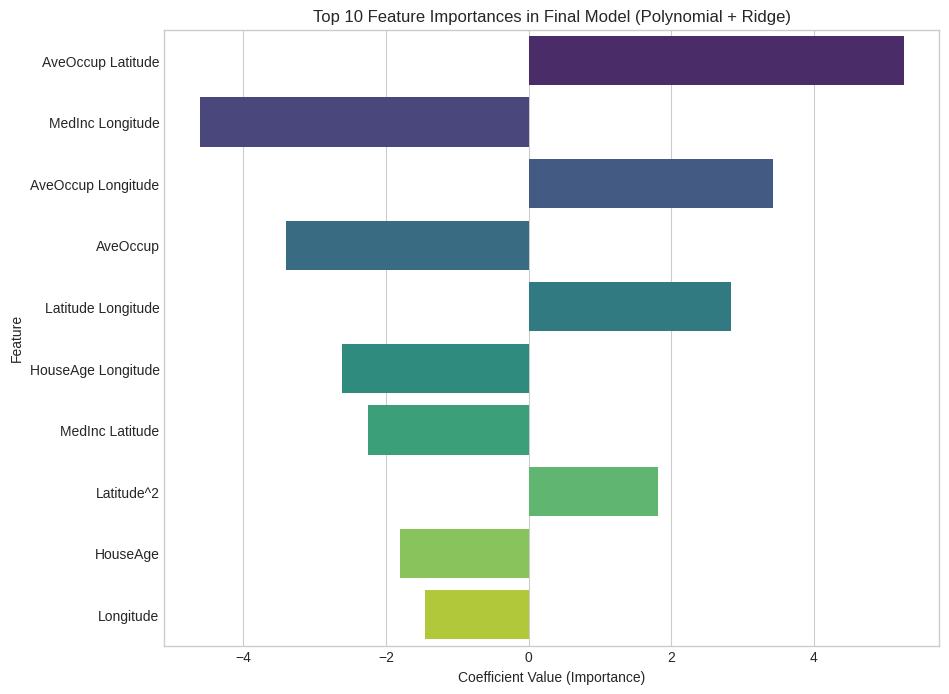

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Preparation (re-run for clarity) ---
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Definitions ---
# Model 1: Simple Linear Regression
pipe_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Model 2: Lasso Regression (for feature selection)
pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(alpha=0.01, random_state=42))
])

# Model 3: Overfitting Polynomial Regression (Unregularized)
pipe_poly = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Model 4: Tuned Polynomial Ridge Regression (Our Final Model from GridSearchCV)
# Note: We re-run the grid search here to get the training time and final model in one place
param_grid = {'ridge_reg__alpha': [0.1, 1.0, 10.0, 100.0, 200.0]}
pipe_ridge_poly = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("ridge_reg", Ridge(solver="cholesky"))
])
grid_search = GridSearchCV(pipe_ridge_poly, param_grid, cv=5, scoring='neg_mean_squared_error')


# --- Training and Evaluation Loop ---
models = {
    "Linear Regression": pipe_linear,
    "Lasso Regression": pipe_lasso,
    "Polynomial (d=2, Unregularized)": pipe_poly,
    "Polynomial (d=2, Ridge Tuned)": grid_search # Use the grid_search object
}

results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    training_time = end_time - start_time
    predictions = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results.append({
        "Model": name,
        "Test RMSE": rmse,
        "Test R² Score": r2,
        "Training Time (s)": training_time
    })

# --- Display Results Table ---
results_df = pd.DataFrame(results)
print("--- Model Comparison Table ---")
print(results_df.to_string(index=False))

# --- Feature Importance Analysis for the Best Model ---
final_model = grid_search.best_estimator_
poly_feature_names = final_model.named_steps['poly_features'].get_feature_names_out(X.columns)
ridge_coeffs = final_model.named_steps['ridge_reg'].coef_

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': ridge_coeffs
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances in Final Model (Polynomial + Ridge)')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.grid(True, axis='x')
plt.show()